# Time calculation

The aim of this notebook is to introduce a way to calculate the time a player needs to join a point (x,y) from his position (x(0),y(0)) given his initial speed. 

## Calculation
----

Without loss of generality, we will determine the time it takes for a player at a given position and with a given speed to reach the point $(x,y)=(0,0)$.  Initially the velocity of the player at position $(x(0),y(0))$ is $(u(0),v(0))$. 
 
We will consider that the player will use a constant force (per unit mass) in a given direction, of strength $|F|^2=F_x^2 + F_y^2$. This is an assumption which allows to find a simple analytical solution. In particular, it allows to consider the two directions  separately.

Newton's law writes :

\begin{equation}
    d_t^2x = F_x
    \label{eq:1} \tag{1}
\end{equation}

so that we have :

\begin{equation}
    x(t) = x(0) + u(0)t + \frac{1}{2}F_x t^2.
    \label{eq:2} \tag{2}
\end{equation}  

We evaluate this expression at $x = 0$, and want to determine at which time this point is reached. Let us first determine the force per mass $F_x$,

\begin{equation}
    F_x = - 2\frac{x(0)+u(0)t}{t^2}
    \label{eq:3} \tag{3}
\end{equation}

Analogous expressions to ($\eqref{eq:1}$-$\eqref{eq:3}$) are written  for $d_t^2 y$, $y(t)$ and $F_y$.
Since $|F|^2 = F_x^2 + F_y^2$, we have,

\begin{equation}
    F^2 = 4\left(\left(\frac{x(0)+u(0)t}{t^2}\right)^2 + \left(\frac{y(0)+v(0)t}{t^2}\right)^2\right)
    \label{eq:4} \tag{4}
\end{equation}

Yielding a $4^{th}$ order polynomial for t,

\begin{equation}
        t^4 - \frac{4}{F^2}\left(\left(x(0)+u(0)t\right)^2 + \left(y(0)+v(0)t\right)^2\right) = 0 
        \label{eq:5} \tag{5}
\end{equation}

This equation has formally 4 solutions. However, only one of these is the shortest physical time for a player to reach the origin. The constraints to choose the correct solution are that the time needs to be the smallest positive and real root of equation ($\eqref{eq:5}$).

The present model contains one adjustable control parameter, the value of $F$. A previous investigation [1] suggests that the value of $F$ should be of order 10m/s. We used this value for our work.
In principle, since we have not bounded the velocity of a defender and fixed its acceleration, nonphysically large velocities can be developed. Thereto in a previous model [1] the dynamics were refined introducing a drag, which limits the increase in velocity. However, for the present application, the time it takes for a defender to reach a shooter rarely exceeds 1 second, so that the velocities do not reach non-physical values. Therefore, and for the sake of simplicity,  we have chosen not to refine the model any further.

(You can find this calcul in the following [pdf](https://github.com/AmigoCap/MecaFootCo/blob/master/Closest_player_to_a_point.pdf))

## Implementation
---

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import json
import python_files.space as sp
from python_files.data_extracter import json_extracter
import pandas as pd

data,events=json_extracter('data/game1.json')

### Function Time_to_point

This function returns the time required to go from point a to point b with initial speed v. F is the value of the force granted to a player (per unit of mass). 

In [15]:
def time_to_point(a,b,v,F=10*3.28):   
    "time to go from a to b with initial speed v, F is the force parameter in feet/s-2"
    x0,y0=a
    xf,yf=b
    X=x0-xf
    Y=y0-yf
    k4=1
    k3=0
    k2=4*(v[0]**2+v[1]**2)/F**2
    k1=8*(v[0]*X+v[1]*Y)/F**2
    k0=4*(X**2+Y**2)/F**2
    times=np.roots([k4,k3,-k2,-k1,-k0])
    for i in range(4):                      # Selection of the root real and positive
        if times[i].imag==0:
            if times[i]>0:
                return times[i].real
    print('error')
    return times[0]

## Example of trajectories with our model
-----

The black arrow represents the force, the green arrow the initial speed, the red point the initial position and the blue point the position to reach.

In [16]:
def path(a,b,v,F=10*3.28,nb_points=100):
    tf=time_to_point(a,b,v,F)
    Fx=2*(b[0]-a[0]-v[0]*tf)/tf**2
    Fy=2*(b[1]-a[1]-v[1]*tf)/tf**2
    dt=tf/nb_points
    t=dt
    lx=[a[0]]
    ly=[a[1]]
    for i in range(nb_points):
        x=a[0]+v[0]*t+Fx*t**2/2
        y=a[1]+v[1]*t+Fy*t**2/2
        lx.append(x)
        ly.append(y)
        t=t+dt
    return(lx,ly,Fx,Fy,tf)

In [17]:
def print_path(a,b,v,F=10*3.28):
    lx,ly,Fx,Fy,tf=path(a,b,v,F)
    plt.plot(lx,ly)
    plt.plot(a[0],a[1], 'ro')
    plt.plot(b[0],b[1], 'bo')
    plt.arrow(a[0],a[1],Fx/10,Fy/10,shape='full',lw=1.5,head_width=0.2)
    plt.arrow(a[0],a[1],v[0],v[1],shape='full',lw=1.5,head_width=0.2, color='g')
    plt.xlim(min(v[0],Fx/10,0)-2,max(v[0],Fx/10,0)+2)
    plt.ylim(min(v[1],Fy/10,0)-2,max(v[1],Fy/10,0)+2)
    plt.show()

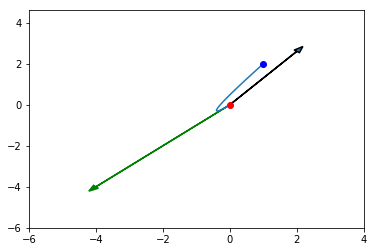

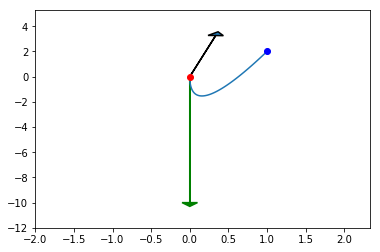

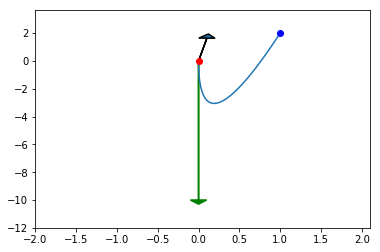

In [18]:
plt.subplots()
print_path(np.array([0,0]),np.array([1,2]),np.array([-4,-4]))
print_path(np.array([0,0]),np.array([1,2]),np.array([0,-10]))
print_path(np.array([0,0]),np.array([1,2]),np.array([0,-10]),F=5*3.28)

## Sources 
[1] Akira Fujimura and Kokichi Sugihara. Geometric analysis and quantitative evaluation of sport teamwork. *Systems and Computers in Japan*, 36(6):49–58, 2005.